In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/dataset/

In [3]:
ls

aboutdata.txt  winequality-red.csv


#**Data Information :**
**fixed acidity**: most acids involved with wine or fixed or nonvolatile (do not evaporate readily).

**volatile acidity**: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.

**citric acid**: found in small quantities, citric acid can add 'freshness' and flavor to wines.

**residual sugar**: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.

**chlorides**: the amount of salt in the wine.

**free sulfur dioxide**: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.

**total sulfur dioxide**: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.

**density**: the density of wine is close to that of water depending on the percent alcohol and sugar content.

**pH**: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.

**sulphates**: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant.

**alcohol**: the percent alcohol content of the wine.

quality: output variable (based on sensory data, score between 0 and 10).

#Importing necessary libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import time
warnings.filterwarnings("ignore")

#Split Data Train and Test
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV

#Modelling
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, f1_score, precision_score, recall_score

#Loading Data...........

In [5]:
redwine = pd.read_csv('winequality-red.csv')
redwine.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
114,7.8,0.56,0.19,1.8,0.104,12.0,47.0,0.9964,3.19,0.93,9.5,5


In [6]:
redwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
#Now let's check the dataset shape so we can see the number of rows and columns
redwine.shape

(1599, 12)

#EDA and Data Exploration

After checking our dataset is fine and "ready to go" we are going to explore the data a little bit more, we are going to plot important information that will help us check how features behave and how they are correlated. We will also try to extract as much information as we can from it to help us understand the dataset better.

Knowing our target variable is "quality", we are now going to plot some information about it. Let's see which values this column contains and how many of them there are.

In [8]:
redwine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Exploring Features:

In [9]:
redwine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

We can see there are many feature entities

Below Scatter plot to show alcohol density for different wine qualities :

<Axes: xlabel='density', ylabel='alcohol'>

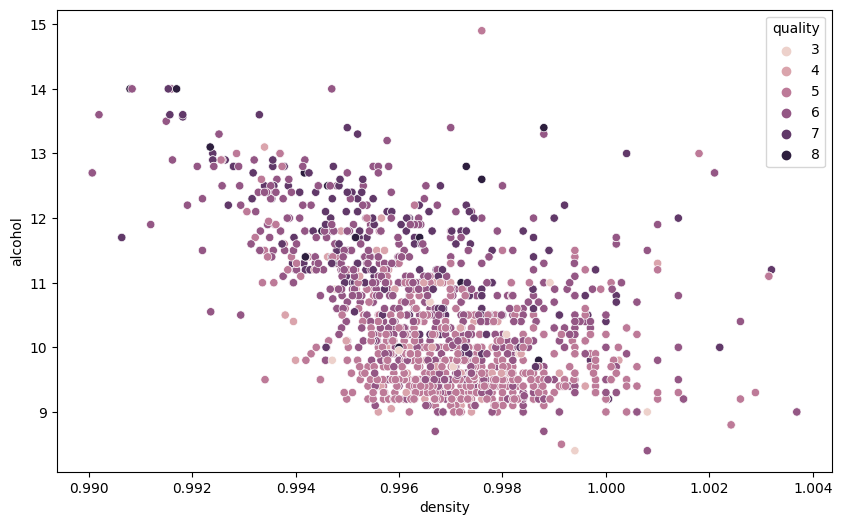

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='density', y='alcohol', data= redwine, hue='quality')

Below graphs shows quality of wine:

* Low: contains wines whose quality is 3 or 4.
* Medium: contains wines whose quality is 5 or 6.
* High: contains wines whose quality is 7 or 8.

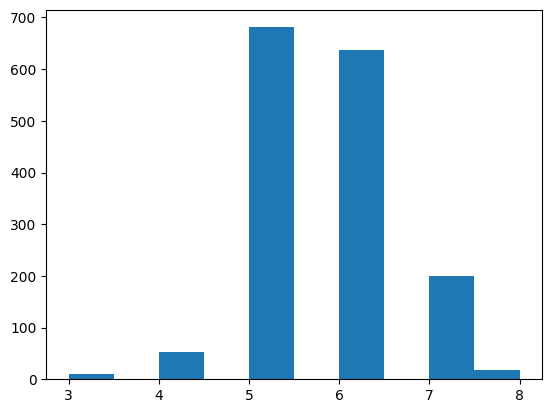

In [11]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.hist(redwine['quality'],bins=10)
plt.show()

Analysing Feature Distribution :

In [12]:
# sns.pairplot(redwine)

Below boxplots to show outliers for different features those are grouped by quality of wine

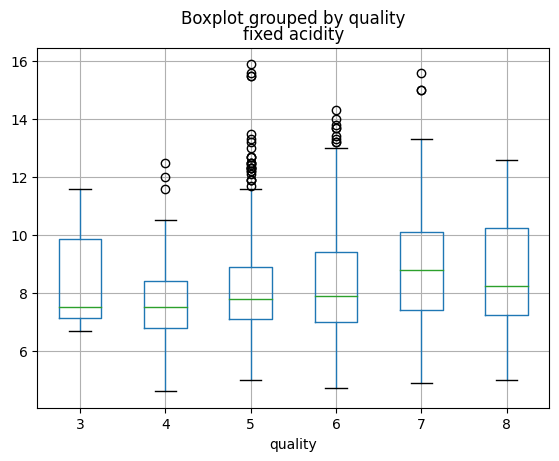

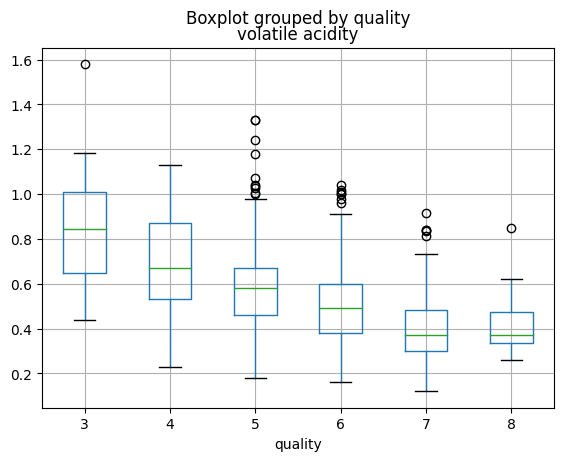

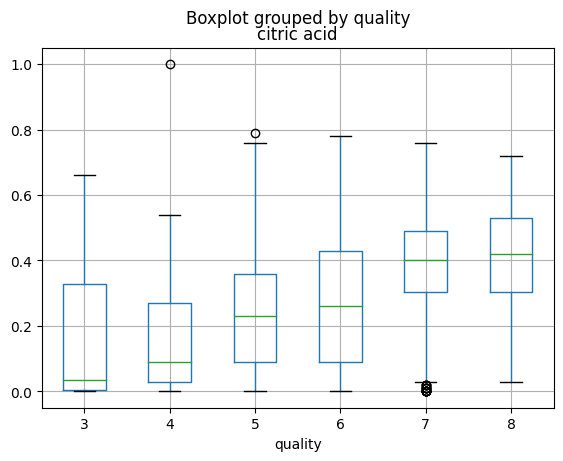

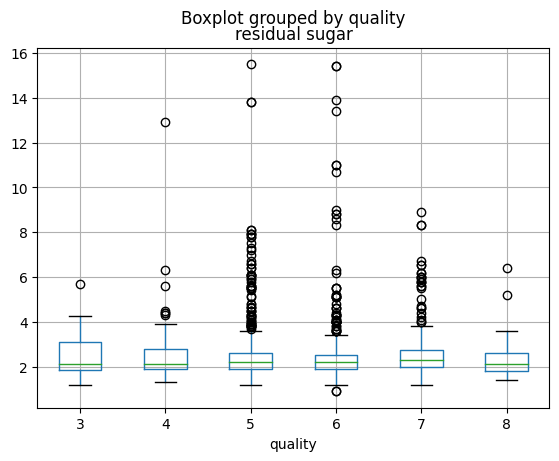

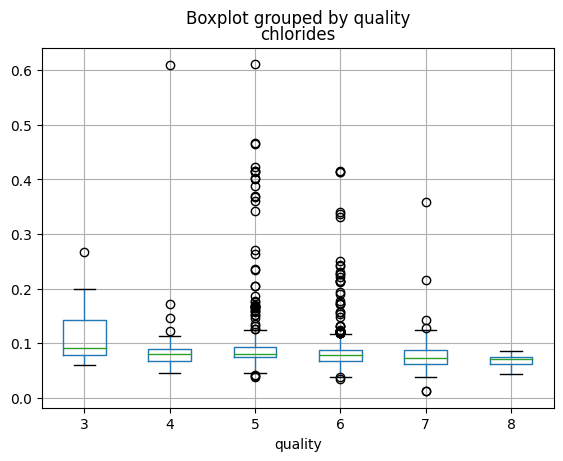

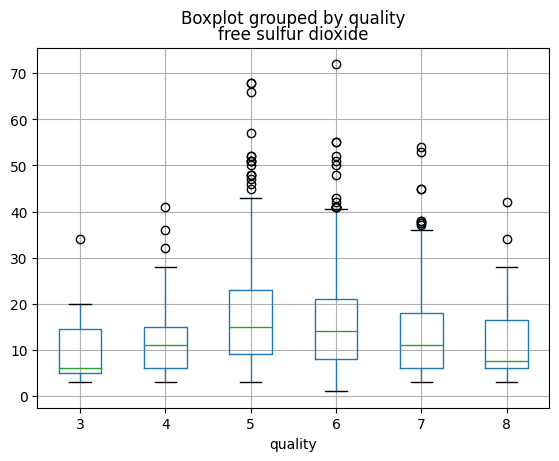

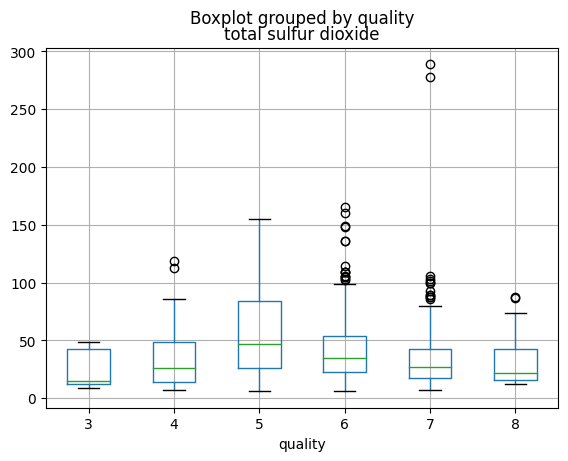

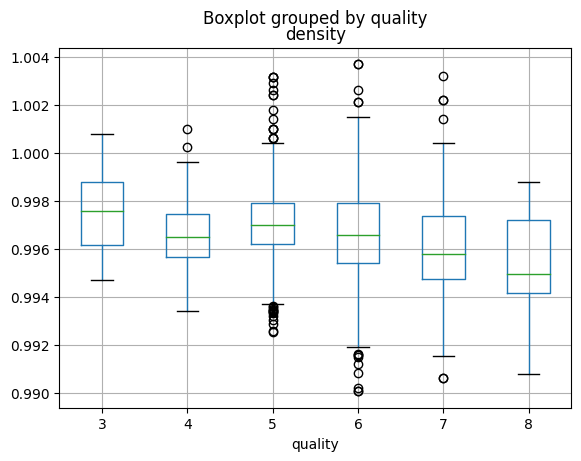

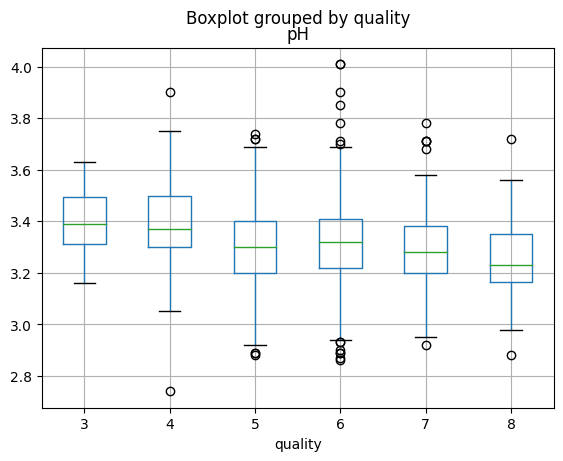

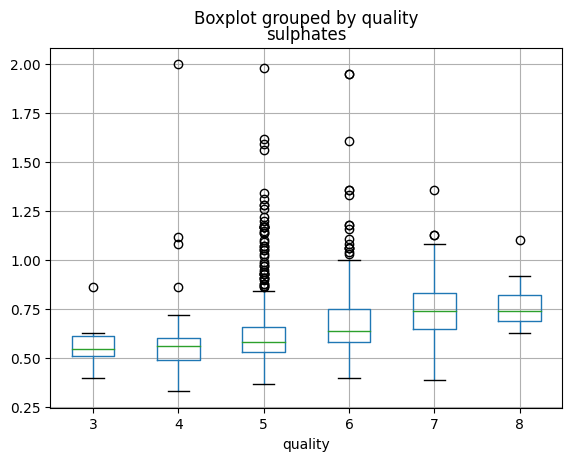

In [13]:
for f in redwine.columns[:-2]:
    redwine.boxplot(column=f, by=redwine.columns[-1])
    plt.title(f)
plt.show()

Below boxplot we can see how wines that contain less alcohol seem to be getting worse ratings while the ones with higher alcohol % are getting better quality ratings. However, we can observe how "mid quality" wines with rating 5 or 6 are presenting some strange values.

[Text(0.5, 1.0, 'Alcohol Percent in Different Quality Wines')]

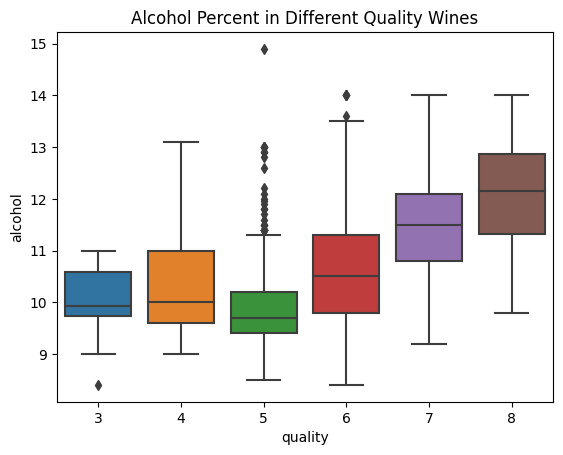

In [14]:
bp = sns.boxplot(x='quality',y='alcohol', data=redwine)
bp.set(title="Alcohol Percent in Different Quality Wines")

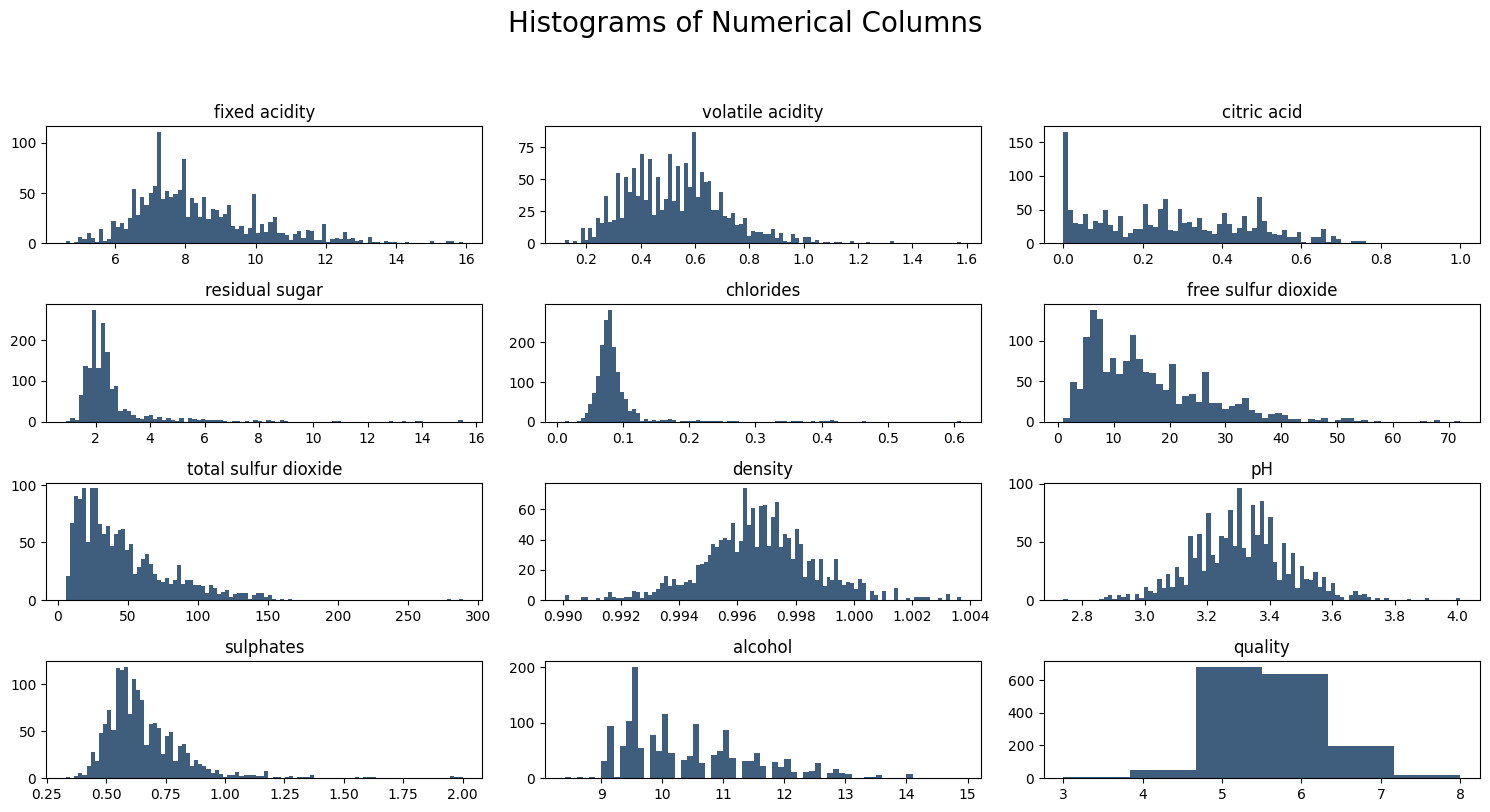

In [15]:
## Histograms
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(redwine.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(redwine.columns.values[i])

    vals = np.size(redwine.iloc[:, i].unique())
    if vals >= 100:
        vals = 100

    plt.hist(redwine.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Now that we got information about our target variable we are going to study the correlation between quality and other features and see which are the ones that play an important role in deciding the quality of a wine.

<Axes: title={'center': 'Correlation with quality'}>

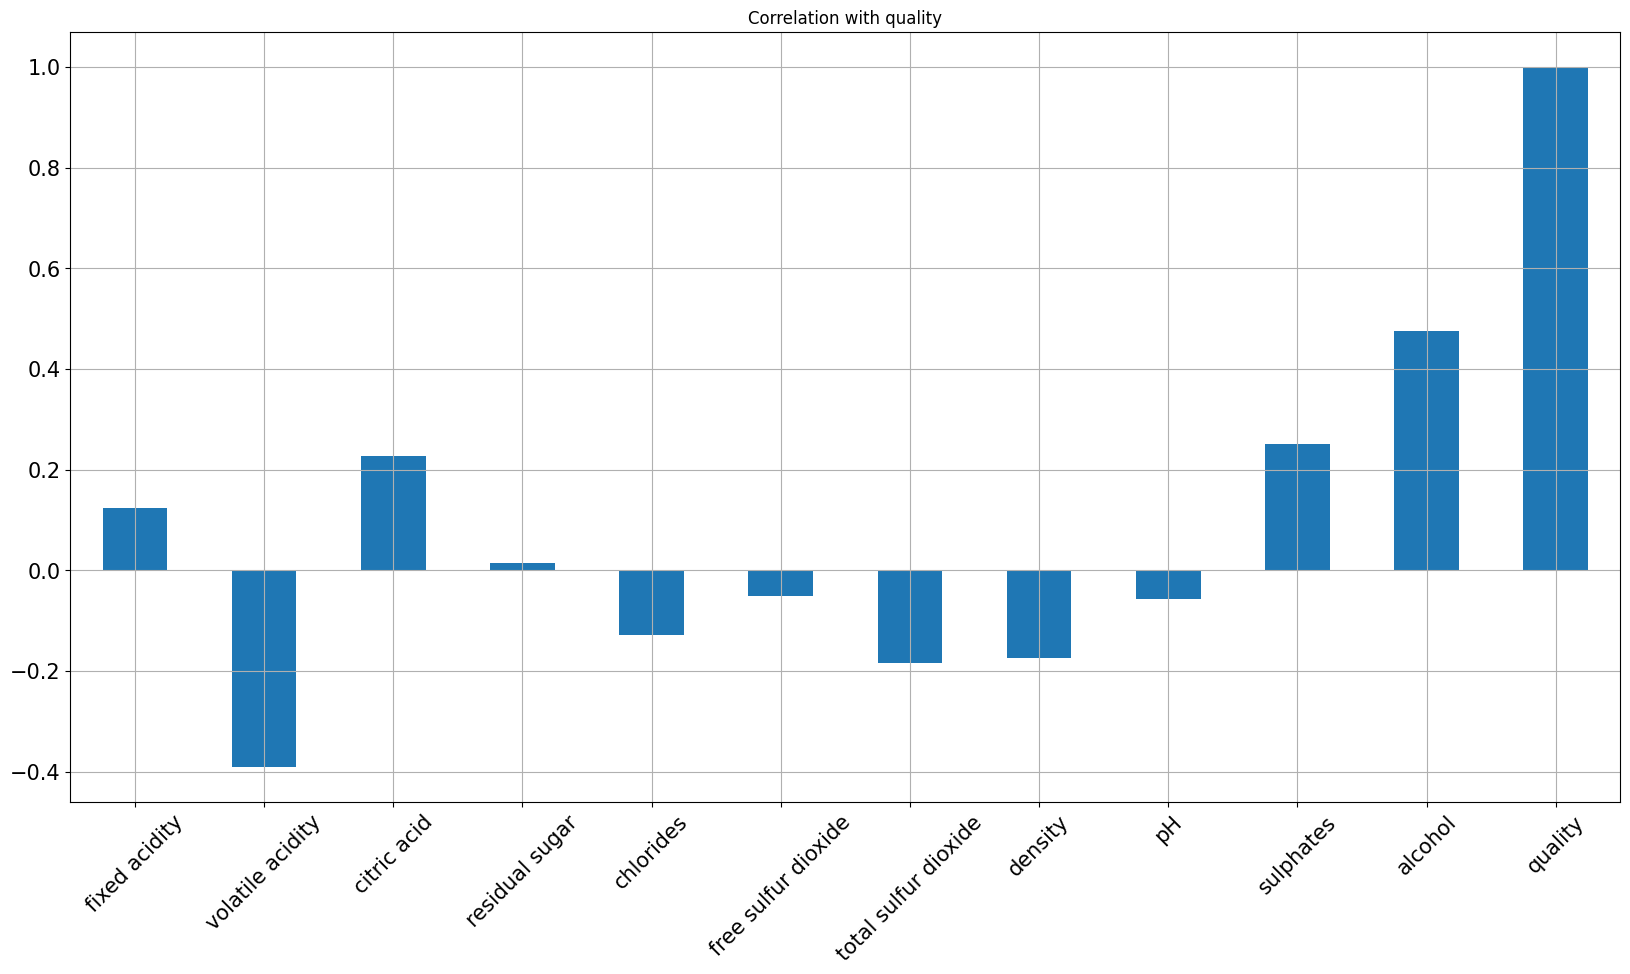

In [16]:
#Correlation with Quality with respect to attributes
redwine.corrwith(redwine.quality).plot.bar(
        figsize = (20, 10), title = "Correlation with quality", fontsize = 15,
        rot = 45, grid = True)

Having now the correlation values between quality and the other features, let's have a look at the correlation matrix to have a better understanding of how features correlate with each other.

In [17]:
## Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = redwine.corr()
corr.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907


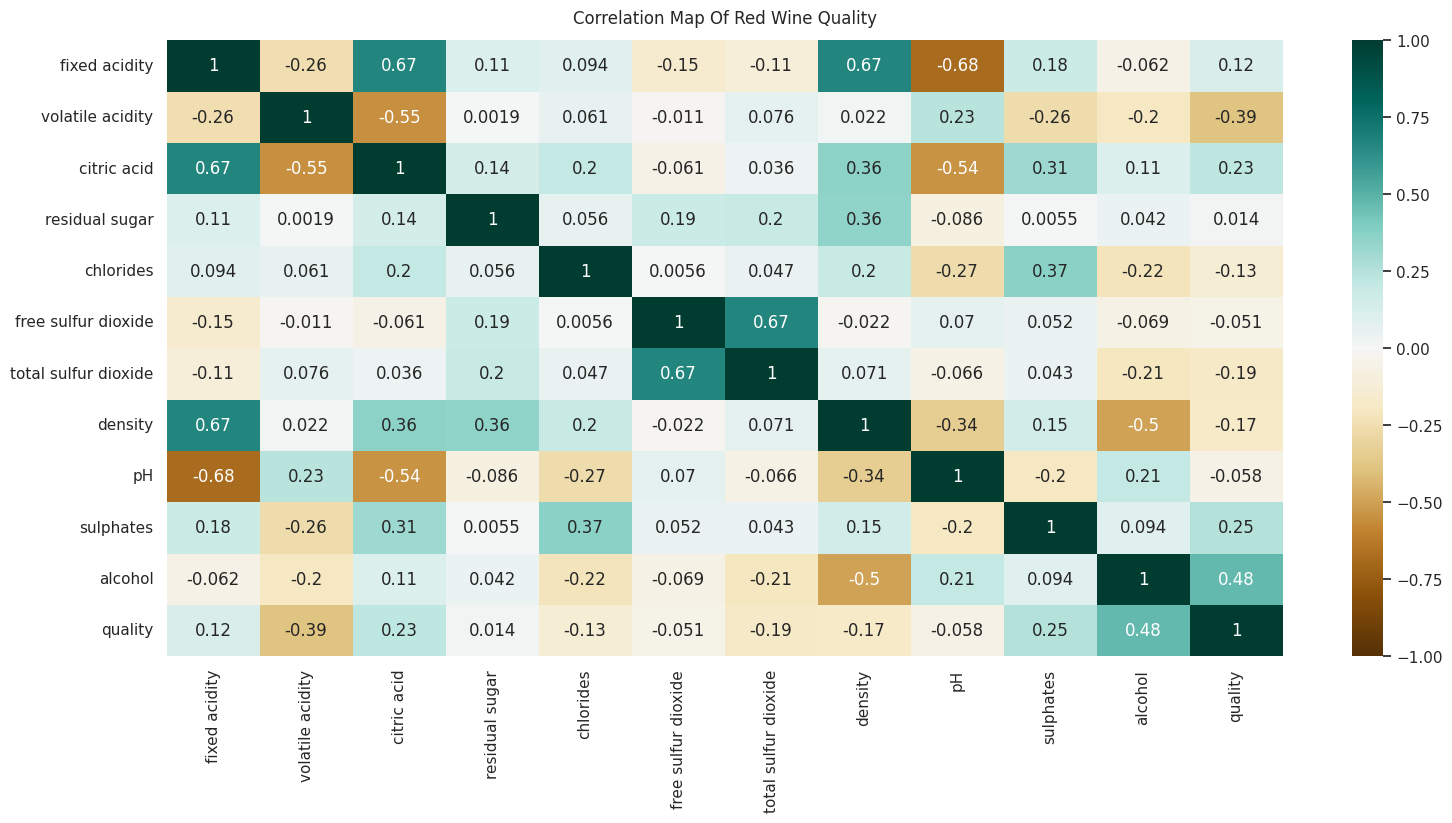

In [18]:
plt.figure(figsize=(18, 8))
sns.heatmap(redwine.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Correlation Map Of Red Wine Quality', fontdict={'fontsize':12}, pad=12);

From this matrix we can observe, apart from the information we had before, some obvious feature correlations such as pH and acidity. Apart from that, we get to know the percentage of the correlations we obtained before. We can also observe that approximately half of these features correlate positively with quality while the other half correlate negatively.

From all these features, we are going to select the ones with bigger numbers since these are the ones that will give us more information.

<Axes: >

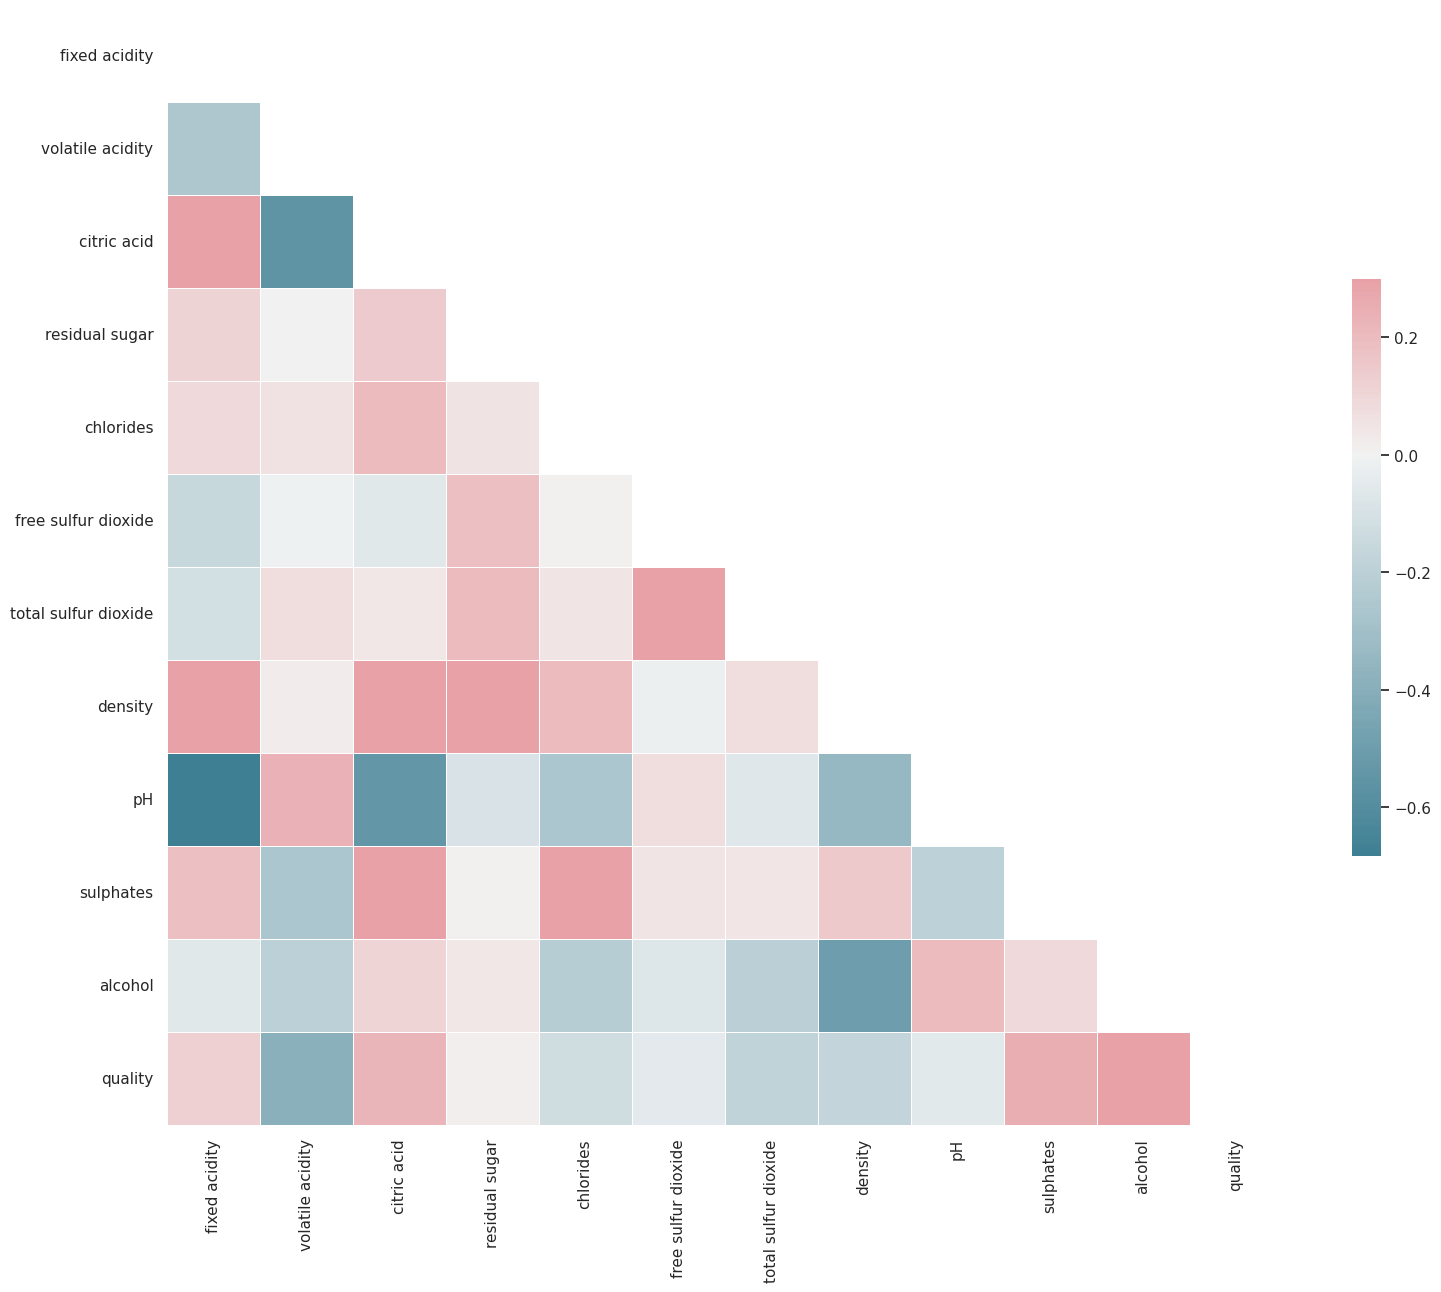

In [19]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#Pre-Processing

In [20]:
redwine['quality'].unique()

array([5, 6, 7, 4, 8, 3])

* If the quality value > 6, it means the quality is good and I define it as 1.
* If the quality value < 6, it means the quality is bad and I define it as 0.

In [21]:
redwine['quality'] = np.where(redwine['quality'] > 6, 1, 0)
redwine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

From this actual data, there are more bad qualities than good ones. Also indicated that the data is imbalanced.

Checking for missing values

In [22]:
redwine.isnull().sum() #No missing values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


There are no missing values. Pretty clean dataset!



In [23]:
# Function to detect outliers using IQR
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((data < lower_bound) | (data > upper_bound)).sum()

# Detect outliers for each feature
outliers_count = redwine.drop(columns="quality").apply(detect_outliers)
outliers_count

fixed acidity            49
volatile acidity         19
citric acid               1
residual sugar          155
chlorides               112
free sulfur dioxide      30
total sulfur dioxide     55
density                  45
pH                       35
sulphates                59
alcohol                  13
dtype: int64

It is suggested to make the quality a binary variable. Let's say for quality >= 6 is good quality or is good = 1 and for quality < 6 is not of good quality or is good = 0

Since our dataset isn't particularly huge, eliminating all these outliers can result in a significant loss of information. Instead, we can deal with them by employing strategies like capping the outliers. Instead of eliminating outlier numbers, this procedure sets them to a defined maximum or minimum value (like the upper or lower bound).

Let's now examine data balancing. We have already noted that the classes of the goal variable, "quality," are unbalanced. The performance of the model can be enhanced by balancing the classes, particularly for the underrepresented classes.



There are several ways to address class inequality:



* By undersampling, you can lessen the number of samples in the overrepresented class or classes.

* Oversampling is the practice of increasing the proportion of occurrences from the underrepresented class or classes. SMOTE (Synthetic Minority Online Trading Environment) is a popular method for this.

* Using different evaluation metrics: Instead of accuracy, we can use metrics like F1-score, precision, recall, or the area under the ROC curve that give more weight to the under-represented class.
For this analysis, we'll explore the effect of SMOTE on our dataset. First, let's apply SMOTE and observe the new distribution of the target variable.

Let's now examine data balancing. We have already noted that the classes of the goal variable, "quality," are unbalanced. The performance of the model can be enhanced by balancing the classes, particularly for the underrepresented classes.


####Checking for Dataset skewness

In [24]:
for f in redwine.columns[:-2]:
    print('Feature:{}\n Skew = {} \n\n'.format(f,redwine[f].skew()))

Feature:fixed acidity
 Skew = 0.9827514413284587 


Feature:volatile acidity
 Skew = 0.6715925723840199 


Feature:citric acid
 Skew = 0.3183372952546368 


Feature:residual sugar
 Skew = 4.54065542590319 


Feature:chlorides
 Skew = 5.680346571971722 


Feature:free sulfur dioxide
 Skew = 1.250567293314441 


Feature:total sulfur dioxide
 Skew = 1.515531257594554 


Feature:density
 Skew = 0.07128766294927483 


Feature:pH
 Skew = 0.19368349811284427 


Feature:sulphates
 Skew = 2.4286723536602945 




0    86.429018
1    13.570982
Name: quality, dtype: float64


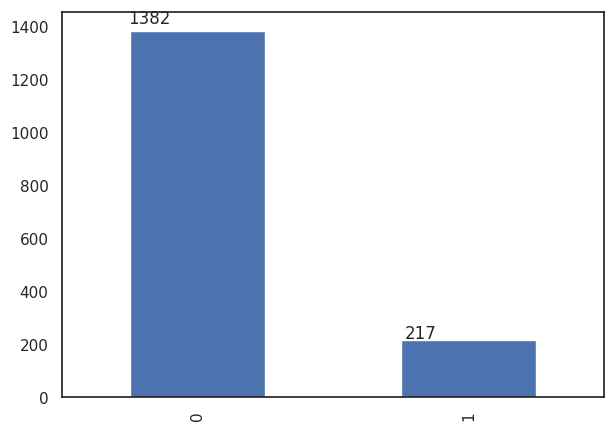

In [25]:
ax = redwine["quality"].value_counts().plot.bar(figsize=(7,5))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))

print(redwine["quality"].value_counts(normalize=True)*100)

We can see the dataset is skewed (unbalanced).
Of whole dataset ~5% belong to class 4, 8 and 3 combined

#Feature Enggineering

######Assigning and dividing the dataset

In [26]:
X = redwine.drop('quality',axis=1)
y = redwine['quality']

In [27]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [28]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

In [29]:
redwine.columns[:11]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [30]:
features_label = redwine.columns[:11]

#####SMOTE to address class inequality

In [31]:
smote = SMOTE(sampling_strategy="auto", random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

quality_counts_resampled = y_resampled.value_counts()
quality_counts_resampled

0    1382
1    1382
Name: quality, dtype: int64

###Feature Importance

In [32]:
#Fitting Random Forest Classification to the Training set for genrating feature importance

classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier.fit(X, y)
importances = classifier.feature_importances_
indices = np. argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i],importances[indices[i]]))

 1) fixed acidity                  0.178690
 2) volatile acidity               0.128748
 3) citric acid                    0.106496
 4) residual sugar                 0.095718
 5) chlorides                      0.089280
 6) free sulfur dioxide            0.083482
 7) total sulfur dioxide           0.070669
 8) density                        0.070104
 9) pH                             0.060459
10) sulphates                      0.060048
11) alcohol                        0.056307


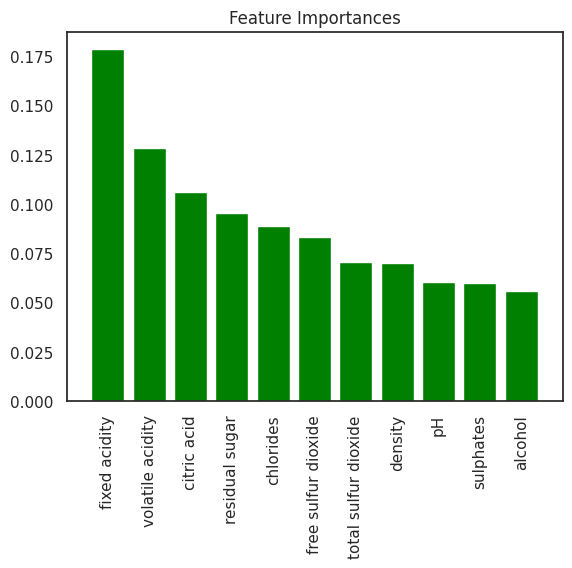

In [33]:
plt.title('Feature Importances')
plt.bar(range(X.shape[1]),importances[indices], color="green", align="center")
plt.xticks(range(X.shape[1]),features_label, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

Above graph showcase the fetaures importance for quality of wine

##Modeling

In [34]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled , test_size = 0.20, random_state = 5)

Given the nature of the dataset and the models we'll be using (Random Forest and KNN), it's important to standardize the data:

KNN is distance-based, meaning that it uses distances between data points to determine their similarity. Features with larger scales can disproportionately impact the distances. Standardizing ensures all features have equal weight.
Random Forest isn't necessarily affected by the scale of features, but standardizing can still be beneficial, especially when interpreting feature importances.
Let's standardize the dataset using the StandardScaler.

#####Feature Scaling

In [35]:
sc = StandardScaler()

X_train2 = pd.DataFrame(sc.fit_transform(X_train))
X_test2 = pd.DataFrame(sc.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

X_train = X_train2
X_test = X_test2

#####Principal Dimensional Reduction
Technique for analyzing large datasets containing a high number of dimensions/features per observation, increasing the interpretability of data while preserving the maximum amount of information, and enabling the visualization of multidimensional data.

In [36]:
pca = PCA(n_components = 4)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(pd.DataFrame(explained_variance))

          0
0  0.290263
1  0.179900
2  0.151336
3  0.103092


## Model Building:

### Random Forest Classifier

In [37]:
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

model_results = pd.DataFrame([['Random Forest (n=100)', acc, prec, rec, f1]],
               columns = ['Model (Classifier)', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# results = results.append(model_results, ignore_index = True)
print(model_results)

      Model (Classifier)  Accuracy  Precision    Recall  F1 Score
0  Random Forest (n=100)  0.884268   0.891446  0.881506  0.883025


#####Model Evalutation

######K-fold Cross Validation for Random Forest Classifier

In [38]:
accuracies = cross_val_score(estimator = classifier, X= X_train, y = y_train,
                             cv = 10)
print("Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

Random Forest Classifier Accuracy: 0.89 (+/- 0.03)


####Grid Search

In [39]:
# Entropy
parameters = {"max_depth": [3, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["entropy"]}

grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
print(rf_best_accuracy, rf_best_parameters)

# Predicting Test Set
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

results = pd.DataFrame([['Random Forest (n=100, Entropy)', acc, prec, rec, f1]],
               columns = ['Model (Classifier)', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

model_results = model_results.append(results, ignore_index = True)
model_results

Took 194.22 seconds
0.8923606864783336 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


,Model (Classifier),Accuracy,Precision,Recall,F1 Score
0,Random Forest (n=100),0.884268,0.891446,0.881506,0.883025
1,"Random Forest (n=100, Entropy)",0.895118,0.904354,0.892073,0.893826


In [40]:
#  Gini
parameters = {"max_depth": [3, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["gini"]}

# Make sure classifier points to the RF model
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
print(rf_best_accuracy, rf_best_parameters)

# Predicting Test Set
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

results = pd.DataFrame([['Random Forest (n=100, GSx2 + Gini)', acc, prec, rec, f1]],
               columns = ['Model (Classifier)', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

model_results = model_results.append(results, ignore_index = True)
model_results

Took 131.29 seconds
0.8928090986914518 {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


,Model (Classifier),Accuracy,Precision,Recall,F1 Score
0,Random Forest (n=100),0.884268,0.891446,0.881506,0.883025
1,"Random Forest (n=100, Entropy)",0.895118,0.904354,0.892073,0.893826
2,"Random Forest (n=100, GSx2 + Gini)",0.900542,0.906961,0.898035,0.899585


The **Entropy** and Information Gain method focuses on purity and impurity in a node. The **Gini** Index or Impurity measures the probability for a random instance being misclassified when chosen randomly.

In [41]:
#Random Forest
model_results

,Model (Classifier),Accuracy,Precision,Recall,F1 Score
0,Random Forest (n=100),0.884268,0.891446,0.881506,0.883025
1,"Random Forest (n=100, Entropy)",0.895118,0.904354,0.892073,0.893826
2,"Random Forest (n=100, GSx2 + Gini)",0.900542,0.906961,0.898035,0.899585


###KNN Classifier

In [42]:
# Set up the parameter grid for KNN
param_grid_knn = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

testing_accuracy = []
training_accuracy = []
score = 0

for i in param_grid_knn['n_neighbors']:
    knn = KNeighborsClassifier(n_neighbors = i)
    pipe_knn = Pipeline([('scale', MinMaxScaler()), ('knn', knn)])
    pipe_knn.fit(X_train, y_train)

    y_pred_train = pipe_knn.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_pred_train))

    y_pred_test = pipe_knn.predict(X_test)
    acc_score = accuracy_score(y_test,y_pred_test)
    testing_accuracy.append(acc_score)

    if score < acc_score:
        score = acc_score
        best_k = i

print('KNN Best Accuracy Score', score, 'Best K-Score', best_k)


KNN Best Accuracy Score 0.9077757685352622 Best K-Score 1


####Line plot between training and testing accuracy for optimal K

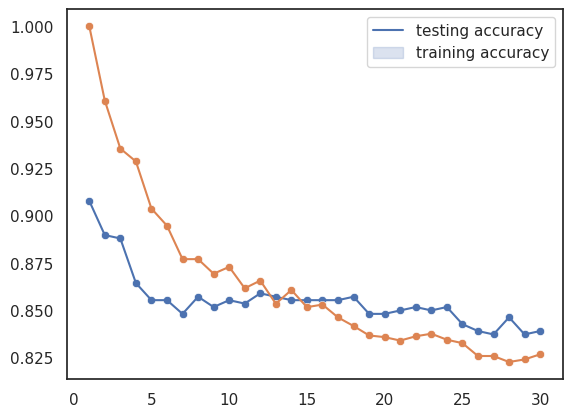

In [43]:
sns.lineplot(x=param_grid_knn['n_neighbors'], y=testing_accuracy)
sns.scatterplot(x = param_grid_knn['n_neighbors'], y =testing_accuracy)

sns.lineplot(x=param_grid_knn['n_neighbors'], y=training_accuracy)
sns.scatterplot(x=param_grid_knn['n_neighbors'], y=training_accuracy)
plt.legend(['testing accuracy', 'training accuracy'])

A large K value has benefits which include reducing the variance due to the noisy data, the side effect being developing a bias due to which the learner tends to ignore the smaller patterns which may have useful insights. The data indicates underfitting.

####Grid Search

In [44]:
# Initialize the KNN Classifier
knn = KNeighborsClassifier()

# Set up GridSearchCV for hyperparameter tuning
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn,
                               cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search model
grid_search_knn.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params_knn = grid_search_knn.best_params_
best_params_knn

Fitting 3 folds for each of 120 candidates, totalling 360 fits


{'metric': 'manhattan', 'n_neighbors': 14, 'weights': 'distance'}

Define Model Using Best K-Score, Now, see if the HyperParameter Tuning process can boost until getting the maximum score.

In [45]:
# Train the KNN classifier using the best hyperparameters
knn_best = KNeighborsClassifier(**best_params_knn)
knn_best.fit(X_train, y_train)

# Predict on the test set
knn_predictions = knn_best.predict(X_test)

# Evaluate the model's performance
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_classification_report = classification_report(y_test, knn_predictions)

print('knn_accuracy for  k: ',str(best_params_knn['n_neighbors']), '\t', knn_accuracy*100)
print('\nClassification Report for KNN CLassifier\n')
print(knn_classification_report)


acc = accuracy_score(y_test, knn_predictions)
prec = precision_score(y_test, knn_predictions, average='macro')
rec = recall_score(y_test, knn_predictions, average='macro')
f1 = f1_score(y_test, knn_predictions, average='macro')

knn_test = 'KNN for best k: ' +str(best_params_knn['n_neighbors'])

results = pd.DataFrame([[knn_test, acc, prec, rec, f1]],
               columns = ['Model (Classifier)', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(results, ignore_index = True)


knn_accuracy for  k:  14 	 89.33092224231464

Classification Report for KNN CLassifier

              precision    recall  f1-score   support

           0       0.95      0.82      0.88       265
           1       0.85      0.96      0.90       288

    accuracy                           0.89       553
   macro avg       0.90      0.89      0.89       553
weighted avg       0.90      0.89      0.89       553



#Final Results of Both the Random Forest and KNN Classifier

In [46]:
model_results

,Model (Classifier),Accuracy,Precision,Recall,F1 Score
0,Random Forest (n=100),0.884268,0.891446,0.881506,0.883025
1,"Random Forest (n=100, Entropy)",0.895118,0.904354,0.892073,0.893826
2,"Random Forest (n=100, GSx2 + Gini)",0.900542,0.906961,0.898035,0.899585
3,KNN for best k: 14,0.893309,0.902031,0.890337,0.892038


#**Conclusion:**


*   With an accuracy of 0.900542, Random Forest (n=100, GSx2 + Gini) outperforms the competition, while Random Forest (n=100, Entropy) comes in second with an accuracy of 0.895118. With an accuracy of 0.893309, both Random Forest models outperformed KNN for the best k: 14.


* In general, Random Forests are more reliable and accurate than KNN models, particularly for high-dimensional data. This is due to the fact that Random Forests create numerous decision trees using various data subsets, then average their predictions. The model's variance is decreased and its accuracy is increased through the process of averaging.

* Furthermore, compared to KNN models, Random Forests are more resistant to data noise. This is because each decision tree node is divided by Random Forests using a random subset of the features. This helps avoid the model being overfit to the training set of data.

* The Random Forest model with GSx2 + Gini fared better in this instance than the Random Forest model with Entropy. This is probably due to the GSx2 + Gini feature selection criterion's superior ability to choose critical features for the model.

The best model for predicting wine quality in this classification task, overall is the **Random Forest model with GSx2 + Gini**. It is the most reliable and accurate model, and it should translate well to new data.

  

